# Part I - Ford GoBike Exploration
## by Mohamed OLOU

## Introduction
### This dataset includes information about individual trips made in a bike-sharing system covering the greater San Francisco Bay Area.
> Introduce the dataset

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<br /><br /><br /><br /><br /><br /><br />
<hr /><hr />
<h1 style="color:black; font-style:italic; font-weight:500;" id="wrangling">Preliminary Wrangling</h1>
<hr /><hr />
<br /><br /><br />

<hr />
<br />
<h3 style="color:black; font-style:italic; font-weight:300;" id="gathering">Gathering</h3>

In [2]:
df_bike = pd.read_csv('201902-fordgobike-tripdata.csv')
df_bike.sample(3)

duration_sec                start_time                  end_time  \
122633           228  2019-02-11 11:13:48.8130  2019-02-11 11:17:37.5710   
151299          1248  2019-02-06 17:09:52.2320  2019-02-06 17:30:40.7890   
123047           937  2019-02-11 09:46:52.1570  2019-02-11 10:02:29.8430   

        start_station_id                                 start_station_name  \
122633             239.0                      Bancroft Way at Telegraph Ave   
151299             151.0                               53rd St at Hollis St   
123047             284.0  Yerba Buena Center for the Arts (Howard St at ...   

        start_station_latitude  start_station_longitude  end_station_id  \
122633               37.868813              -122.258764           247.0   
151299               37.836182              -122.287180           244.0   
123047               37.784872              -122.400876           223.0   

                      end_station_name  end_station_latitude  \
122633       Fulton St at Bancroft Way             37.867789   
151299      Shattuck Ave at Hearst Ave             37.873676   
123047  16th St Mission BART Station 2             37.764765   

        end_station_longitude  bike_id   user_type  member_birth_year  \
122633            -122.265896     4483  Subscriber             1999.0   
151299            -122.268487     5180  Subscriber             1986.0   
123047            -122.420091     4422    Customer             1990.0   

       member_gender bike_share_for_all_trip  
122633        Female                      No  
151299          Male                      No  
123047        Female                      No

<hr />
<br />
<h3 style="color:black; font-style:italic; font-weight:300;" id="accessing">Accessing</h3>

In [3]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

<h3>There are some columns that don't have the right format (start_time, end_time, start_station_id, end_station_id, member_birth_year)</h3>

In [4]:
df_bike[["start_time", "end_time", "start_station_id", "end_station_id", "member_birth_year"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   start_time         183412 non-null  object 
 1   end_time           183412 non-null  object 
 2   start_station_id   183215 non-null  float64
 3   end_station_id     183215 non-null  float64
 4   member_birth_year  175147 non-null  float64
dtypes: float64(3), object(2)
memory usage: 7.0+ MB


<h3>There are many null value</h3>

In [5]:
df_bike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

<h3>There are some very old persons that are cyclist</h3>

In [6]:
df_bike.member_birth_year.unique()

array([1984.,   nan, 1972., 1989., 1974., 1959., 1983., 1988., 1992.,
       1996., 1993., 1990., 1981., 1975., 1978., 1991., 1997., 1986.,
       2000., 1982., 1995., 1980., 1973., 1985., 1971., 1979., 1967.,
       1998., 1994., 1977., 1999., 1987., 1969., 1963., 1976., 1964.,
       1965., 1961., 1968., 1966., 1962., 1954., 1958., 1960., 1970.,
       1956., 1957., 1945., 1900., 1952., 1948., 1951., 1941., 1950.,
       1949., 1953., 1955., 1946., 1947., 1931., 1943., 1942., 1920.,
       1933., 2001., 1878., 1901., 1944., 1928., 1934., 1939., 1930.,
       1902., 1910., 1938., 1927.])

<h3>There are some duration that are very long</h3>

In [7]:
df_bike.duration_sec.unique()

array([52185, 42521, 61854, ..., 13251,  5713,  2822], dtype=int64)

<hr />
<br />
<h3 style="color:black; font-style:italic; font-weight:300;" id="cleaning">Cleaning</h3>

In [8]:
#Let make a copy of the dataset
new_df_bike = df_bike.copy()

<h3>Columns format</h3>

<p><b>Define</b></p>
<p>There are some columns that don't have the right format (start_time, end_time, start_station_id, end_station_id, member_birth_year)</p>

<p><b>Cleaning</b></p>

In [9]:
#Let create a function to convert a column format into datetime format
def formatToDateTime(dataframe,column):
    dataframe[column] = pd.to_datetime(dataframe[column])

#Let create a function to convert a column format into int format
def formatToInt(dataframe,column):
    dataframe[column] = dataframe[column].fillna(0).astype(int)

#Let convert start_time, end_time to datetime format
for column in ['start_time', 'end_time']:
    formatToDateTime(new_df_bike,column)
    
#Let convert start_station_id, end_station_id, member_birth_year to int format
for column in ['start_station_id', 'end_station_id', 'member_birth_year']:
    formatToInt(new_df_bike,column)
    

<p><b>Test</b></p>

In [10]:
new_df_bike[["start_time", "end_time", "start_station_id", "end_station_id", "member_birth_year"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   start_time         183412 non-null  datetime64[ns]
 1   end_time           183412 non-null  datetime64[ns]
 2   start_station_id   183412 non-null  int32         
 3   end_station_id     183412 non-null  int32         
 4   member_birth_year  183412 non-null  int32         
dtypes: datetime64[ns](2), int32(3)
memory usage: 4.9 MB


<h3>Null values</h3>

<p><b>Define</b></p>
<p>There are some null values in the dataset</p>

<p><b>Cleaning</b></p>

In [11]:
#Let check null values
new_df_bike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year             0
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [12]:
#Let know differents values of column member_gender
new_df_bike.member_gender.unique()

array(['Male', nan, 'Other', 'Female'], dtype=object)

In [13]:
#Let fill member_gender null value by Unknown
new_df_bike.member_gender.fillna("Unknown", inplace=True)

In [14]:
#Let notice that there was null values in start_station_id and end_station_id

#Those null values was fill by 0 while turning their format into int format

#Let create a function that returns the list of start_station_latitude in the dataframe with condtition
def listLatitude(condition):
    return [*set(new_df_bike[condition].start_station_latitude.to_list())]

#Let find list of start_station_latitude where start_station_id is 0
latitude_list_1 = listLatitude(new_df_bike.start_station_id==0)

#Let find list of start_station_latitude where end_station_id is 0
latitude_list_2 = listLatitude(new_df_bike.end_station_id==0)

#Let create fnction that compare two array
def compareArrays(array1, array2):
    if(np.array_equal(array1,array2)):
        print("The arrays are the same")
    else: print("The arrays are differents")

#Let know if the rows that don't have start_station_id are the same with the row that don't have end_station_id
compareArrays(latitude_list_1,latitude_list_2)

The arrays are the same


In [15]:
#Let find list of start_station_latitude where start_station_name is null
latitude_list_3 = listLatitude(new_df_bike.start_station_name.isna())

#Let find list of start_station_latitude where end_station_name is null
latitude_list_4 = listLatitude(new_df_bike.end_station_name.isna())

#Let know if the rows that don't have start_station_name are the same with the row that don't have end_station_name
compareArrays(latitude_list_3,latitude_list_4)

The arrays are the same


In [16]:
#Let know if the rows that don't have start_station_id are the same with the row that don't have end_station_id
compareArrays(latitude_list_1,latitude_list_4)

The arrays are the same


In [17]:
# Let check if the list latitude correspond to just these null values
new_df_bike[new_df_bike.start_station_latitude.isin(latitude_list_1)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 475 to 181201
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   duration_sec             197 non-null    int64         
 1   start_time               197 non-null    datetime64[ns]
 2   end_time                 197 non-null    datetime64[ns]
 3   start_station_id         197 non-null    int32         
 4   start_station_name       0 non-null      object        
 5   start_station_latitude   197 non-null    float64       
 6   start_station_longitude  197 non-null    float64       
 7   end_station_id           197 non-null    int32         
 8   end_station_name         0 non-null      object        
 9   end_station_latitude     197 non-null    float64       
 10  end_station_longitude    197 non-null    float64       
 11  bike_id                  197 non-null    int64         
 12  user_type                197 no

In [18]:
# We observed that the columns start_station_id, end_station_id, start_station_name and end_station_name have their null value at the same rows
# We also observed that the list of latitude just correspond to null values

#Let know if the id of the bike where we have null value are uniques
print(np.intersect1d(new_df_bike[~new_df_bike.start_station_latitude.isin(latitude_list_1)].bike_id.unique(), new_df_bike[new_df_bike.start_station_latitude.isin(latitude_list_1)].bike_id.unique()))

[]


In [19]:
# That mean that the null value is caused by some specific bike
new_df_bike[new_df_bike.start_station_latitude.isin(latitude_list_1)].bike_id.unique()

array([4211, 4174, 4283, 4089, 4150, 4091, 3975, 4168, 4239, 4250, 4124,
       4189, 4095, 4141, 4197, 4207, 4162, 4249, 4245, 4093, 4165, 4130,
       4092, 4125, 4275, 4157, 4251, 4208], dtype=int64)

In [20]:
# Let drop those specific rows to have a better exploration experience
new_df_bike.drop(index=new_df_bike[new_df_bike.start_station_latitude.isin(latitude_list_1)].index, inplace=True)

<p><b>Test</b></p>

In [21]:
new_df_bike.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

<h3>Old cyclist</h3>

<p><b>Define</b></p>
<p>There are some very old cyclist</p>

<p><b>Cleaning</b></p>

In [22]:
#Let get the age in new columns of the users for each trip
new_df_bike['Age'] = pd.to_datetime('now').year-new_df_bike.member_birth_year
new_df_bike['Age'].unique()

C:\Users\Issa\AppData\Local\Temp\ipykernel_4364\3528795979.py:2: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  new_df_bike['Age'] = pd.to_datetime('now').year-new_df_bike.member_birth_year


array([  38, 2022,   50,   33,   48,   63,   39,   34,   30,   26,   29,
         32,   41,   47,   44,   31,   25,   36,   22,   40,   27,   42,
         49,   37,   51,   43,   55,   24,   28,   45,   23,   35,   53,
         59,   46,   58,   57,   61,   54,   56,   60,   68,   64,   62,
         52,   66,   65,   77,  122,   70,   74,   71,   81,   72,   73,
         69,   67,   76,   75,   91,   79,   80,  102,   89,   21,  144,
        121,   78,   94,   88,   83,   92,  120,  112,   84,   95])

In [23]:
#The oldest cyclist know age is 105 years old 
# Let assume that in our dataset the age more than 100 are wrong data

#Let get the cyclist than are more than 100 years old
len(new_df_bike[new_df_bike['Age']>100])

8338

In [24]:
# There 8,338 row that have a age more than 100 in our dataset of 183215 rows
# Let drop those rows
new_df_bike.drop(index=new_df_bike['Age'][new_df_bike['Age']>100].index, inplace=True)

<p><b>Test</b></p>

In [25]:
len(new_df_bike[new_df_bike['Age']>100])

0

<h3>Long duration trip</h3>

<p><b>Define</b></p>
<p>There are some very long duration trip</p>

<p><b>Cleaning</b></p>

In [26]:
#On average, a cyclist trip is 1 hour

#Let get the trip with more than 1 hour (3600s)
len(new_df_bike[new_df_bike.duration_sec>3600])

1386

In [27]:
# There 1,386 row that have dartion more than 3600s
# Let drop those rows
new_df_bike.drop(index=new_df_bike[new_df_bike.duration_sec>3600].index, inplace=True)

<p><b>Test</b></p>

In [28]:
len(new_df_bike[new_df_bike.duration_sec>3600])

0

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


### What is the structure of your dataset?

There are 183,215 trips in the dataset with 16 features (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip).

Most variables are numeric in nature. But the varibales start_station_name, end_station_name, user_type, member_gender and bike_share_for_all_trip are type string and also start_time and end_time are datetime type.

The variables start_station_name, end_station_name are strings and specify the name of the starting station and the arrival station.<br>
The variables user_type specify if the person who take the bike is a customer or suscriber.<br>
The variables member_gender specify if the person who take the bike is gender male, female or other<br>
The variables bike_share_for_all_trip specify if the bike is shared during the trip<br>

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features are best for predicting the trip arrival in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think the start_station_name, the age and the day will help to predict what the distance and duration that the user will make

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 




>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### How long do most people ride ?

C:\Users\Issa\AppData\Local\Temp\ipykernel_4364\2624141781.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_bike.duration_sec, bins=60)


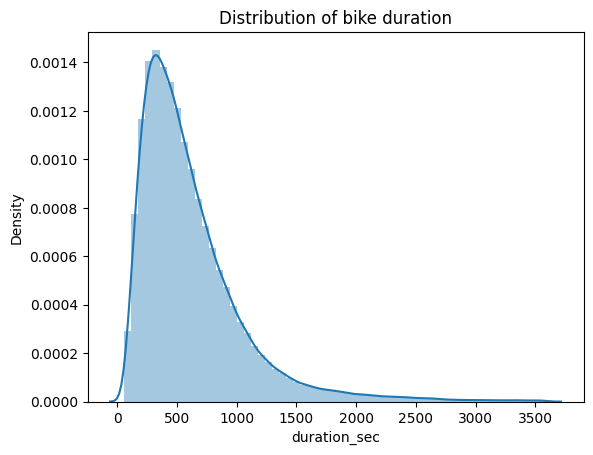

In [29]:
# Let start by looking at the distribution of the trip duration
sns.distplot(new_df_bike.duration_sec, bins=60)
plt.title('Distribution of bike duration')
plt.show()

In [30]:
new_df_bike.duration_sec.describe()

count    173491.000000
mean        618.488014
std         443.765147
min          61.000000
25%         321.000000
50%         507.000000
75%         780.000000
max        3596.000000
Name: duration_sec, dtype: float64

The chart show a distribution at right of the duration trip with a peak between 300 and 500. That mean that most of person ride between 5 and 8 min

### How old are most cyclists ?

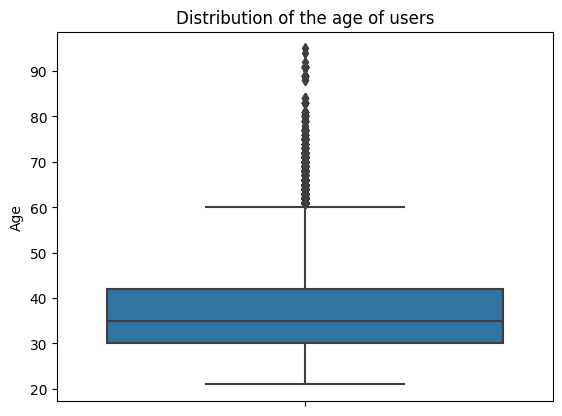

In [31]:
# Let look at the distribution of the Age in the dataset (boxplot)
sns.boxplot(data=new_df_bike, y='Age')
plt.title('Distribution of the age of users')
plt.show()

C:\Users\Issa\AppData\Local\Temp\ipykernel_4364\2106324836.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_bike.Age, bins=50)


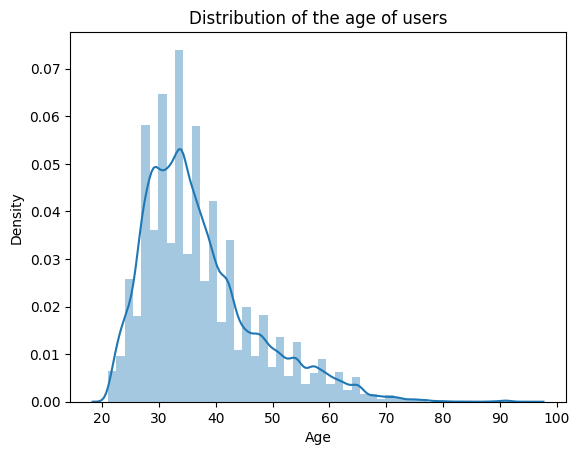

In [32]:
# Let look at the distribution of the Age in the dataset (histogram)
sns.distplot(new_df_bike.Age, bins=50)
plt.title('Distribution of the age of users')
plt.show()

In [33]:
new_df_bike.Age.describe()

count    173491.000000
mean         37.155386
std           9.967410
min          21.000000
25%          30.000000
50%          35.000000
75%          42.000000
max          95.000000
Name: Age, dtype: float64

The charts show that the most people that use those bike for a trip are between 26 and 36 year old

### What is the proportion of gender in this dataset ?

In [34]:
new_df_bike.member_gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

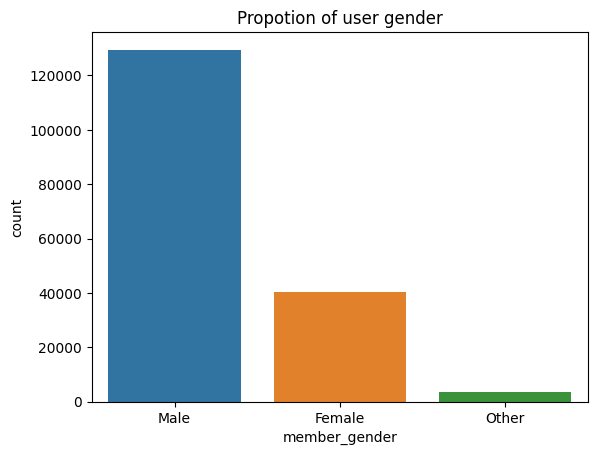

In [35]:
# Let see the proportion of the users genders.
sns.countplot(x='member_gender', data=new_df_bike)
plt.title('Propotion of user gender')
plt.show()

The chart shows that most of people that use those bike are man and the women are less than a third of men. After that we observe that few people are classified in other category.

### When bike are most used ?

In [36]:
# Let create new column that will contain the hour when the bike are used
# new_df_bike['start_time'].year
new_df_bike['hour_of_use'] = pd.DatetimeIndex(new_df_bike['start_time']).hour
new_df_bike

duration_sec              start_time                end_time  \
4               1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   
5               1793 2019-02-28 23:49:58.632 2019-03-01 00:19:51.760   
6               1147 2019-02-28 23:55:35.104 2019-03-01 00:14:42.588   
7               1615 2019-02-28 23:41:06.766 2019-03-01 00:08:02.756   
8               1570 2019-02-28 23:41:48.790 2019-03-01 00:07:59.715   
...              ...                     ...                     ...   
183407           480 2019-02-01 00:04:49.724 2019-02-01 00:12:50.034   
183408           313 2019-02-01 00:05:34.744 2019-02-01 00:10:48.502   
183409           141 2019-02-01 00:06:05.549 2019-02-01 00:08:27.220   
183410           139 2019-02-01 00:05:34.360 2019-02-01 00:07:54.287   
183411           271 2019-02-01 00:00:20.636 2019-02-01 00:04:52.058   

        start_station_id                                start_station_name  \
4                      7                               Frank H Ogawa Plaza   
5                     93                      4th St at Mission Bay Blvd S   
6                    300                              Palm St at Willow St   
7                     10                        Washington St at Kearny St   
8                     10                        Washington St at Kearny St   
...                  ...                                               ...   
183407                27                           Beale St at Harrison St   
183408                21  Montgomery St BART Station (Market St at 2nd St)   
183409               278                            The Alameda at Bush St   
183410               220                       San Pablo Ave at MLK Jr Way   
183411                24                             Spear St at Folsom St   

        start_station_latitude  start_station_longitude  end_station_id  \
4                    37.804562              -122.271738             222   
5                    37.770407              -122.391198             323   
6                    37.317298              -121.884995             312   
7                    37.795393              -122.404770             127   
8                    37.795393              -122.404770             127   
...                        ...                      ...             ...   
183407               37.788059              -122.391865             324   
183408               37.789625              -122.400811              66   
183409               37.331932              -121.904888             277   
183410               37.811351              -122.273422             216   
183411               37.789677              -122.390428              37   

                           end_station_name  end_station_latitude  \
4                     10th Ave at E 15th St             37.792714   
5                        Broadway at Kearny             37.798014   
6                  San Jose Diridon Station             37.329732   
7                    Valencia St at 21st St             37.756708   
8                    Valencia St at 21st St             37.756708   
...                                     ...                   ...   
183407  Union Square (Powell St at Post St)             37.788300   
183408                3rd St at Townsend St             37.778742   
183409            Morrison Ave at Julian St             37.333658   
183410             San Pablo Ave at 27th St             37.817827   
183411                  2nd St at Folsom St             37.785000   

        end_station_longitude  bike_id   user_type  member_birth_year  \
4                 -122.248780     4898  Subscriber               1974   
5                 -122.405950     5200  Subscriber               1959   
6                 -121.901782     3803  Subscriber               1983   
7                 -122.421025     6329  Subscriber               1989   
8                 -122.421025     6548  Subscriber               1988   
...                       ...      ...

C:\Users\Issa\AppData\Local\Temp\ipykernel_4364\1438815868.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_bike.hour_of_use, bins=24)


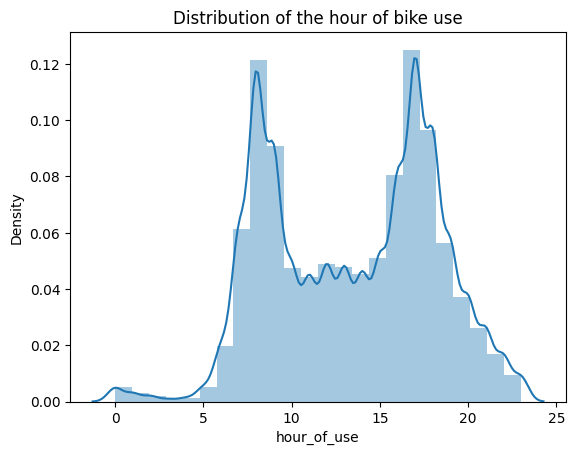

In [37]:
sns.distplot(new_df_bike.hour_of_use, bins=24)
plt.title('Distribution of the hour of bike use')
plt.show()

The chart show a bimodal distribution of the hour of use with a peak between 09:00 and 10:00 and between 17:00 and 19:00. That mean that most of people ride early morning before 10:00 or at evening after 17:00.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> To show the distribution of hour of use, we had to create new column from the start_time column

<!-- ### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There was -->

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### What is the correlation between numerical values in the dataset ?

C:\Users\Issa\AppData\Local\Temp\ipykernel_4364\11445466.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(new_df_bike.corr(), annot=True, cmap="vlag_r")


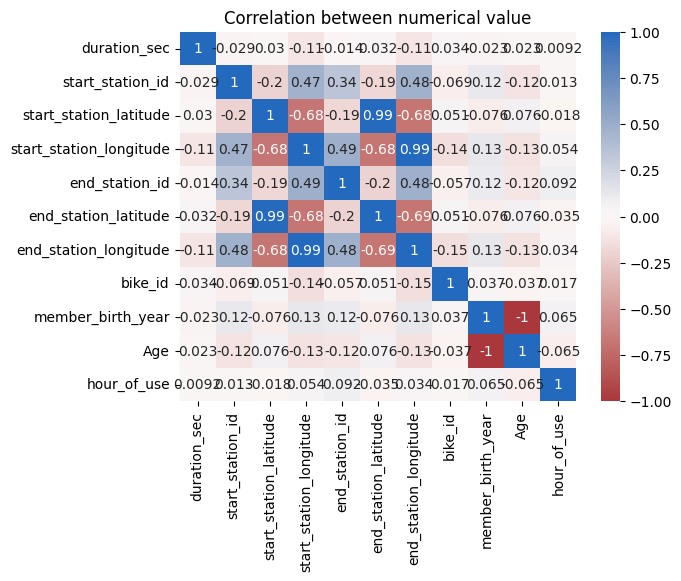

In [38]:
# Let see the correlation with a heatmap
sns.heatmap(new_df_bike.corr(), annot=True, cmap="vlag_r")
plt.title('Correlation between numerical value')
plt.show()

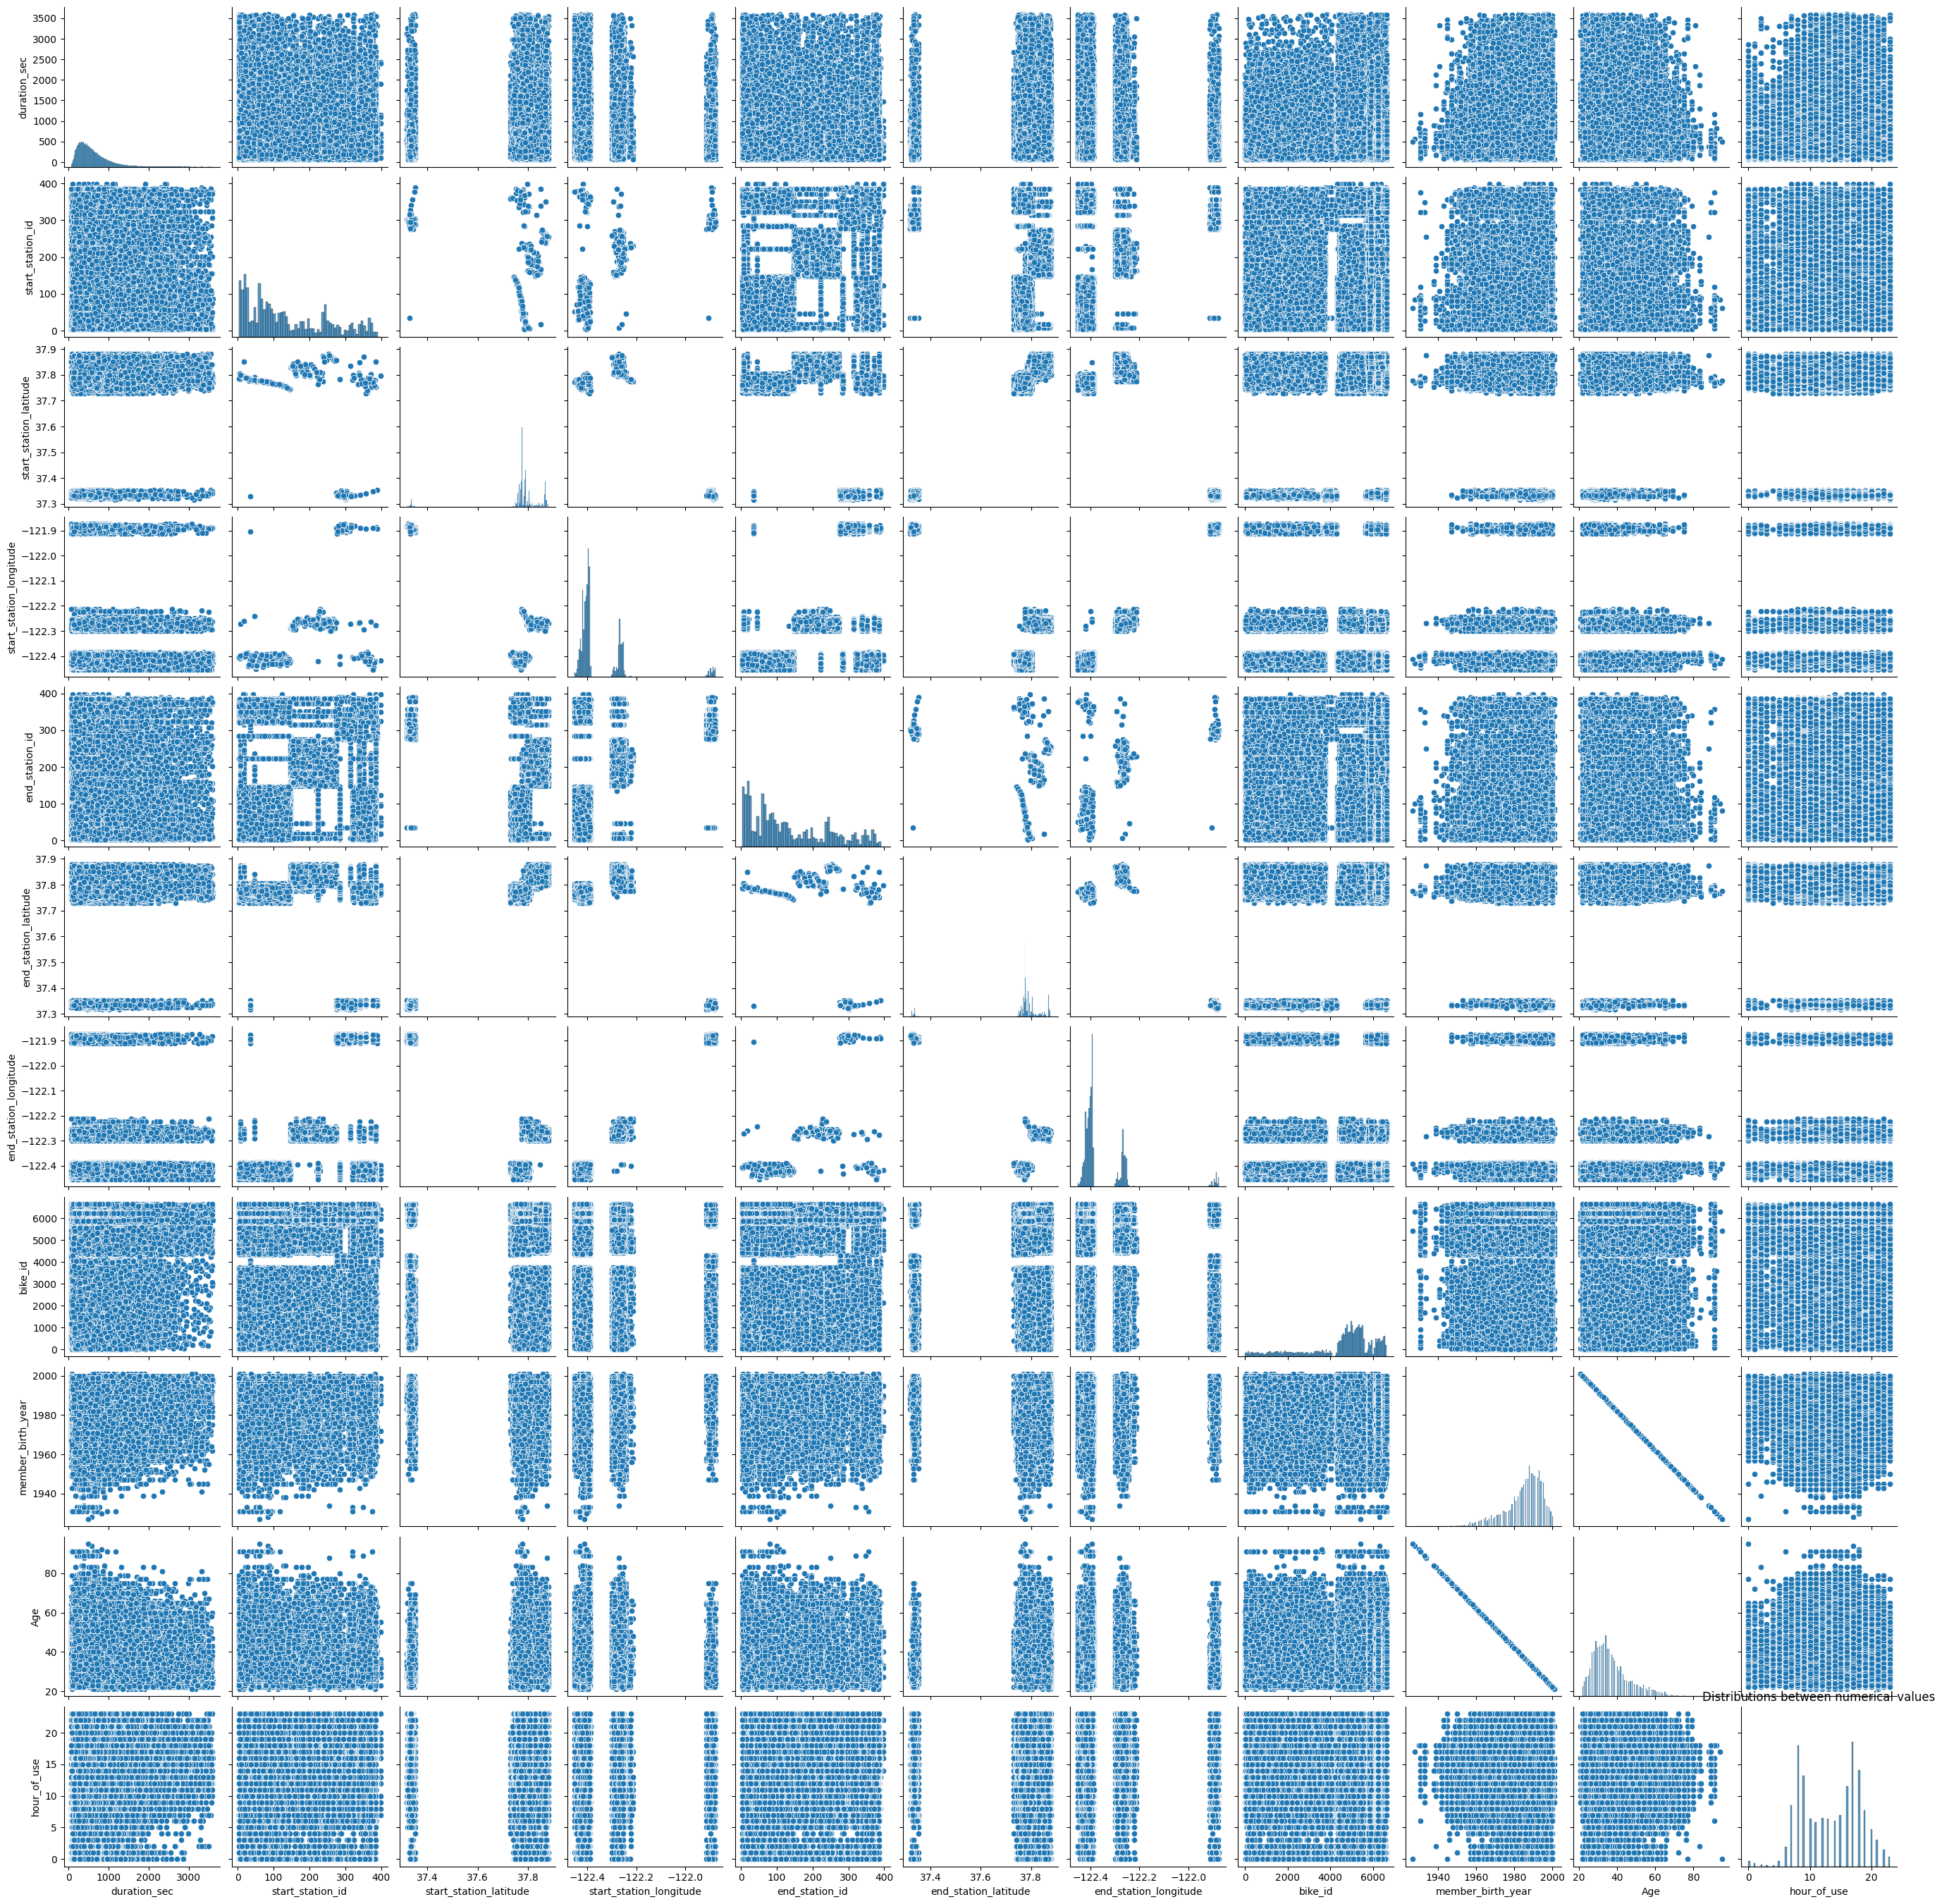

In [39]:
sns.pairplot(data=new_df_bike)
plt.title('Distributions between numerical values')
plt.show()

That charts show that there is no correlation between numerical variables

### What genre rides the longest on average ?

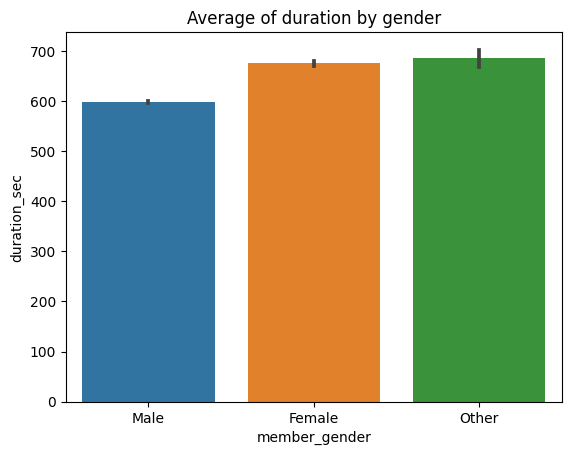

In [40]:
sns.barplot(data=new_df_bike, x="member_gender", y="duration_sec")
plt.title('Average of duration by gender')
plt.show()

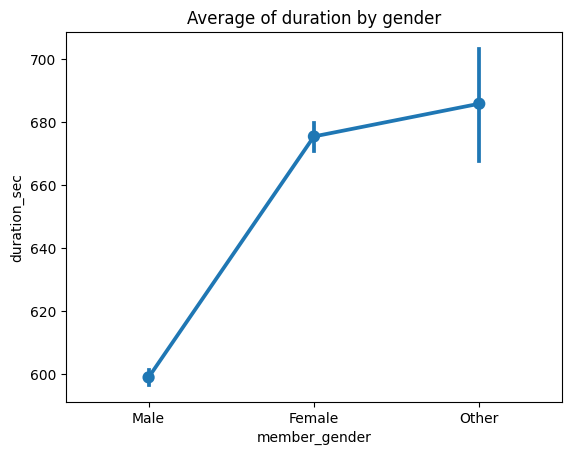

In [41]:
sns.pointplot(data=new_df_bike, x="member_gender", y="duration_sec")
plt.title('Average of duration by gender')
plt.show()

On average female gender last longer at cycling

### What is the ralation between distance and age

In [42]:
from math import sin, cos, sqrt, atan2, radians
R = 6373.0
def getdistance(row):
    distlat = radians(row.end_station_latitude-row.start_station_latitude)
    distlong = radians(row.end_station_longitude-row.start_station_longitude)
    a = sin(distlat/2)**2 + cos(row.start_station_latitude) * cos(row.end_station_latitude) * sin(distlong/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return(distance)

new_df_bike['distance(km)'] = new_df_bike.apply(lambda row: getdistance(row), axis=1)
new_df_bike

duration_sec              start_time                end_time  \
4               1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   
5               1793 2019-02-28 23:49:58.632 2019-03-01 00:19:51.760   
6               1147 2019-02-28 23:55:35.104 2019-03-01 00:14:42.588   
7               1615 2019-02-28 23:41:06.766 2019-03-01 00:08:02.756   
8               1570 2019-02-28 23:41:48.790 2019-03-01 00:07:59.715   
...              ...                     ...                     ...   
183407           480 2019-02-01 00:04:49.724 2019-02-01 00:12:50.034   
183408           313 2019-02-01 00:05:34.744 2019-02-01 00:10:48.502   
183409           141 2019-02-01 00:06:05.549 2019-02-01 00:08:27.220   
183410           139 2019-02-01 00:05:34.360 2019-02-01 00:07:54.287   
183411           271 2019-02-01 00:00:20.636 2019-02-01 00:04:52.058   

        start_station_id                                start_station_name  \
4                      7                               Frank H Ogawa Plaza   
5                     93                      4th St at Mission Bay Blvd S   
6                    300                              Palm St at Willow St   
7                     10                        Washington St at Kearny St   
8                     10                        Washington St at Kearny St   
...                  ...                                               ...   
183407                27                           Beale St at Harrison St   
183408                21  Montgomery St BART Station (Market St at 2nd St)   
183409               278                            The Alameda at Bush St   
183410               220                       San Pablo Ave at MLK Jr Way   
183411                24                             Spear St at Folsom St   

        start_station_latitude  start_station_longitude  end_station_id  \
4                    37.804562              -122.271738             222   
5                    37.770407              -122.391198             323   
6                    37.317298              -121.884995             312   
7                    37.795393              -122.404770             127   
8                    37.795393              -122.404770             127   
...                        ...                      ...             ...   
183407               37.788059              -122.391865             324   
183408               37.789625              -122.400811              66   
183409               37.331932              -121.904888             277   
183410               37.811351              -122.273422             216   
183411               37.789677              -122.390428              37   

                           end_station_name  end_station_latitude  \
4                     10th Ave at E 15th St             37.792714   
5                        Broadway at Kearny             37.798014   
6                  San Jose Diridon Station             37.329732   
7                    Valencia St at 21st St             37.756708   
8                    Valencia St at 21st St             37.756708   
...                                     ...                   ...   
183407  Union Square (Powell St at Post St)             37.788300   
183408                3rd St at Townsend St             37.778742   
183409            Morrison Ave at Julian St             37.333658   
183410             San Pablo Ave at 27th St             37.817827   
183411                  2nd St at Folsom St             37.785000   

        end_station_longitude  bike_id   user_type  member_birth_year  \
4                 -122.248780     4898  Subscriber               1974   
5                 -122.405950     5200  Subscriber               1959   
6                 -121.901782     3803  Subscriber               1983   
7                 -122.421025     6329  Subscriber               1989   
8                 -122.421025     6548  Subscriber               1988   
...                       ...      ...

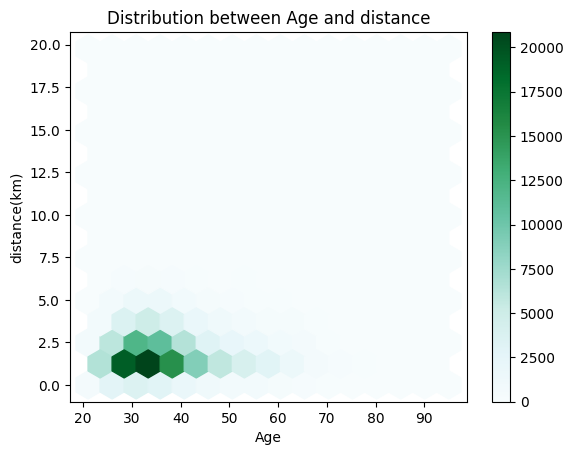

In [43]:
# sns.scatterplot(data=new_df_bike, x="Age", y="duration_sec")
new_df_bike.plot.hexbin(x="Age", y="distance(km)", gridsize=15)
plt.title('Distribution between Age and distance')
plt.show()

That mean most of poeple that ride are between 26 and 36 year old and ride on average 1.25 km

### What is the ralation between distance and member gender

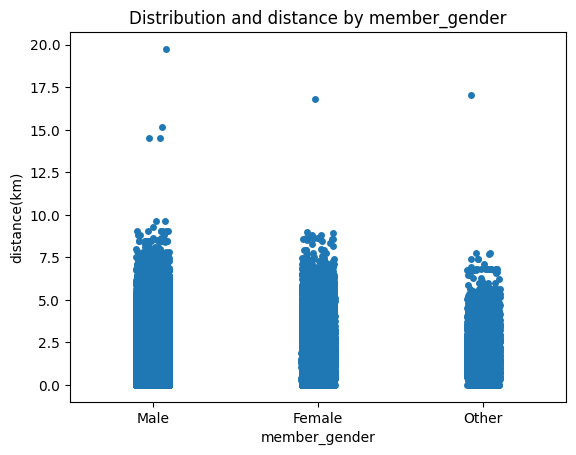

In [44]:
sns.stripplot(x="member_gender",y="distance(km)",data=new_df_bike)
plt.title('Distribution and distance by member_gender')
plt.show()

The plot show that the longest distance is made by a man, the second by other gender and the third by a woman

### What is the ralation between distance and user type

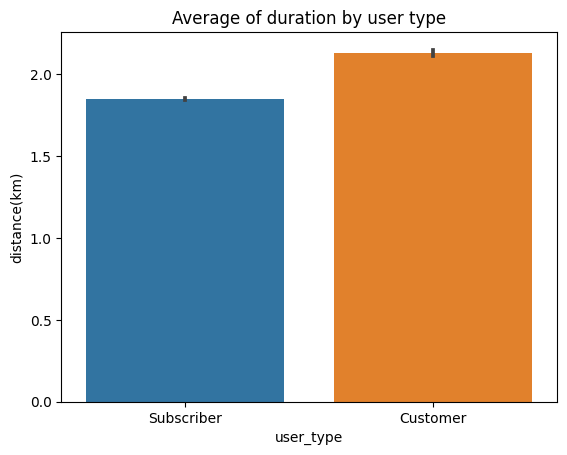

In [45]:
sns.barplot(data=new_df_bike, x="user_type", y="distance(km)")
plt.title('Average of duration by user type')
plt.show()

This plot show that in average, customer make longest distance than suscriber

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### What is the distribution of age in relation to the different values of gender and user type

c:\Python310\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Python310\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Python310\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Python310\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Python310\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args 

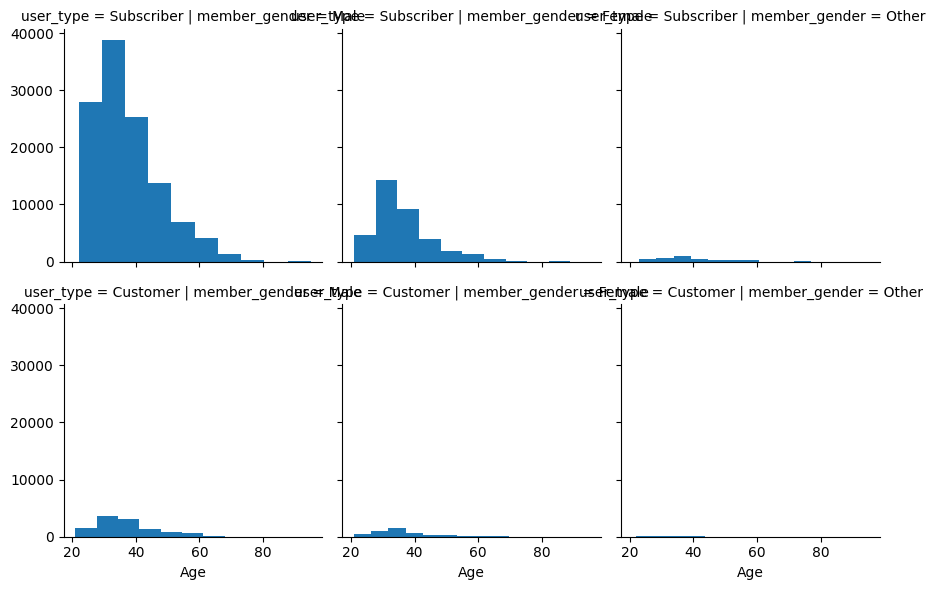

In [46]:
grid = sns.FacetGrid(new_df_bike, col="member_gender", row="user_type")
grid.map(plt.hist, 'Age')
# plt.title('Distribution of age based on user type and member gender')
plt.show()

This plot shows that most of users are male suscriber and are on average 25 to 35 years old

### What is the relation between age and distance in relation to the different values of gender and user type

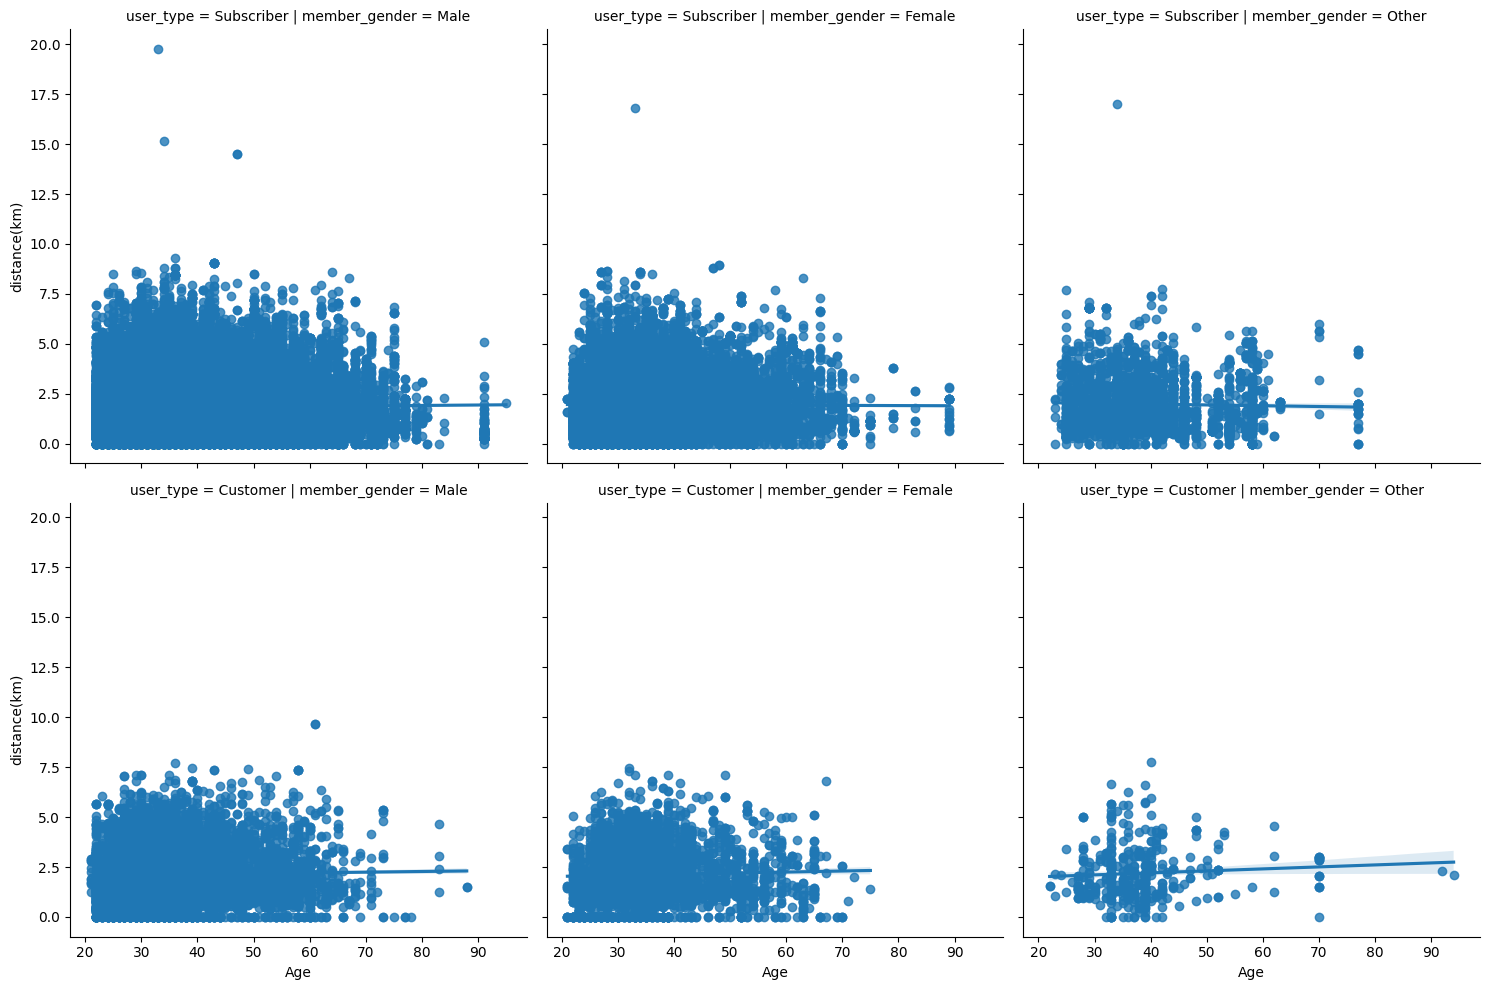

In [47]:
sns.lmplot(data=new_df_bike, x="Age", y="distance(km)", col="member_gender", row="user_type")
# plt.title('Relation between distance and age based on user type and member gender')
plt.show()

This plot shows that there is no relation between distance and age

### What is the relation between gender and distance in relation to the different values of gender and bike sharing

c:\Python310\lib\site-packages\seaborn\categorical.py:292: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sub_data.loc[:, self.cat_axis] = adjusted_data
c:\Python310\lib\site-packages\seaborn\categorical.py:292: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sub_data.loc[:, self.cat_axis] = adjusted_data
c:\Python310\lib\site-packages\seaborn\categorical.py:292: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns

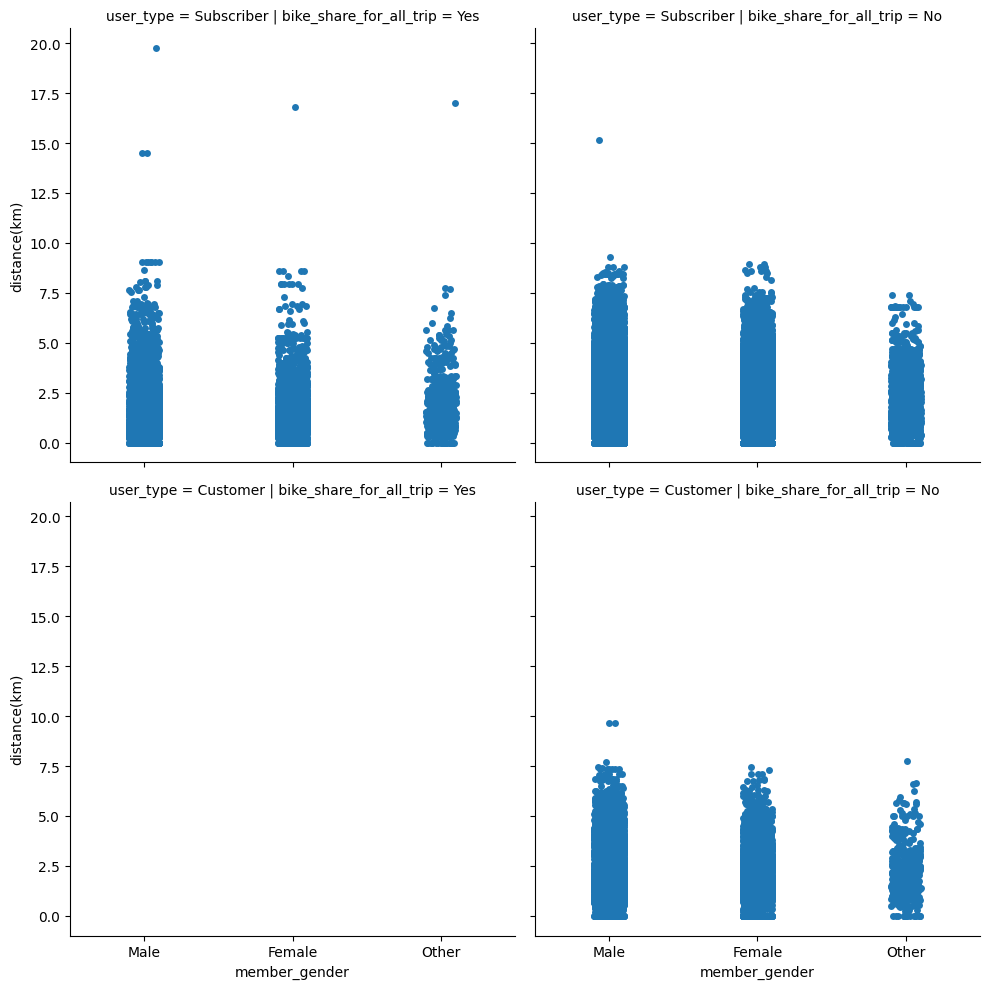

In [48]:
sns.catplot(data=new_df_bike, x="member_gender", y="distance(km)", col="bike_share_for_all_trip", row="user_type")
# plt.title('Relation between distance and age based on user type and member gender')
plt.show()

This plot shows that customers dont share their bike in trip

In [49]:
#Let store new dataset to csv file

new_df_bike.to_csv('FordGoBike.csv', index=False)